## নেইবারের সংখ্যা কতো হলে মডেলের অ্যাক্যুরেসি ভালো
জুপিটার নোটবুকের লিংক https://github.com/raqueeb/ml-python/blob/master/model-evaluation3.ipynb

ডাউনলোড করে নিন নিজের ব্যবহারের জন্য, ধারণার জন্য ধন্যবাদ কেভিন মার্কামকে। ডেটাস্কুল। 

নেইবারের সংখ্যা ৩ থেকে ৫ করার পর অ্যাক্যুরেসি 0.95 থেকে 0.96 হয়েছে। এখন নেইবারের সংখ্যা বার বার পাল্টে দেখা যেতে পারে কোথায় তার অ্যাক্যুরেসি সবচেয়ে বেশি। ম্যানুয়ালি না করে ফেলে দেই প্রোগ্রামিং লুপে। সেই বের করে দেবে কোথায় অ্যাক্যুরেসি ভালো। 

In [1]:
# যোগ করে নেই আগের অংশগুলো 
# শুরুতে লোড করে নেই আইরিস ডেটাসেট 
from sklearn.datasets import load_iris
iris = load_iris()

# ফিচার আর টার্গেট রেসপন্স চলে যাচ্ছে X এবং y
X = iris.data
y = iris.target

# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [2]:
# আমরা K=1 থেকে K=25 লুপ চালিয়ে সেটাকে রেকর্ড করি 
neighbors_settings = list(range(1, 26))
scores = []
for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

ম্যানুয়ালি না দেখে k_range এবং scoresকে x, y এক্সিসে প্লট করি। ভিজ্যুয়ালাইজেশন ইজ দ্য কিং!

Text(0,0.5,'Testing Accuracy')

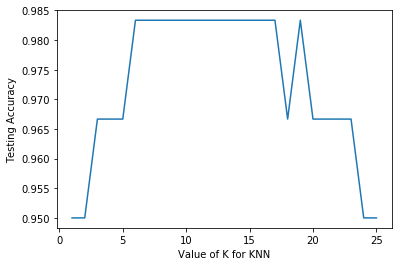

In [3]:
# Matplotlibকে ইমপোর্ট করে নিয়ে আসি (আমাদের সাইন্টিফিক প্লটিং লাইব্রেরি)
import matplotlib.pyplot as plt

# আমাদের জুপিটার নোটবুকে ইনলাইনে দেখানোর জন্য 
%matplotlib inline

# আমরা K এবং "testing accuracy" এর সম্পর্ক প্লট করছি 
plt.plot(neighbors_settings, scores)
# লেবেলের জন্য 
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [4]:
# এখানে দেখছি ৭ থেকে ১৭ পর্যন্ত অ্যাক্যুরেসি ভালো, টেস্ট করছি ১০ দিয়ে 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.983333333333


**কী বুঝলাম এখানে?**

১. "কে-নিয়ারেস্ট নেইবার্স" মডেলের কমপ্লেক্সিটি নির্ভর করছে K এর ভ্যালুর ওপর। ভ্যালু কম হলে কমপ্লেক্সিটি বেশি। 

২. মডেলের ট্রেনিং অ্যাক্যুরেসি বাড়ে মডেলের কমপ্লেক্সিটি বাড়লে। 

৩. টেস্টিং অ্যাক্যুরেসি পেনাল্টি করে মডেল খুব বেশি কমপ্লেক্সিটি অথবা খুব সহজ হয়ে গেলে। 

### কেমন হয় ১৫০ রেকর্ড ডেটাসেটের বাইরের স্যাম্পল দিয়ে প্রেডিক্ট করলে?

In [5]:
# নেইবার্স ১০ ধরলাম 
knn = KNeighborsClassifier(n_neighbors=10)

# মডেলকে ট্রেইন করতে হবে X এবং y দিয়ে (X_train, y_train নয়)
knn.fit(X, y)

# প্রেডিক্ট করি নতুন স্যাম্পল দিয়ে 
knn.predict([[3, 5, 4, 2]])

array([1])

অথবা, যদি সরাসরি জানতে চাই আইরিস প্রজাতির নামটা?

In [6]:
print("Predicted target name:",
       iris['target_names'][knn.predict([[3, 5, 4, 2]])])

Predicted target name: ['versicolor']


### মডেলের মধ্যে কমপ্লেক্সিটি আর জেনেরালাইজেশন এর সম্পর্ক 

মনে আছে "মডেলের জেনারেলাইজেশন, ওভার-ফিটিং এবং আন্ডার-ফিটিং" চ্যাপ্টারের আলাপগুলোর কথা? আমরা একটা সম্পর্ক বের করতে চাচ্ছিলাম মডেল কমপ্লেক্সিটির সাথে 'জেনেরালাইজেশন' নিয়ে। এখানে আমরা আইরিস ডেটাসেটের ট্রেনিং আর টেস্ট ডেটাসেটের পারফরম্যান্স দেখি "কে-নিয়ারেস্ট নেইবার্স" এর নেইবারের সংখ্যা নিয়ে। 

এখানে ট্রেনিং এবং টেস্ট সেটের অ্যাক্যুরেসি দেখতে 'অ্যাক্যুরেসি' ফেলেছি ওয়াই এক্সিসে। "কে-নিয়ারেস্ট নেইবার্স" এর নেইবারের সংখ্যাকে দেখানো হয়েছে এক্স এক্সিসে। মনে আছে তো কম নেইবার মানে বেশি কমপ্লেক্স মডেল? একটা নেইবার নিয়ে ট্রেনিং সেট একদম পারফেক্ট। যখন নেইবার বাড়ছে, মডেল আস্তে আস্তে সিম্পলার মানে সহজ হচ্ছে। ফলে অ্যাক্যুরেসি কমছে। 

টেস্ট সেটের অ্যাক্যুরেসি কিন্তু কম একটা নেইবারে। তবে বেশি নেইবার হওয়াতে সেটা আরো কমছে। একটা নেইবারে মডেল অনেক কমপ্লেক্স তবে যতো বেশি নেইবার বাড়ছে অ্যাক্যুরেসি কমছে। তবে মাঝামাঝি জায়গায় মডেল ভালো করছে। 

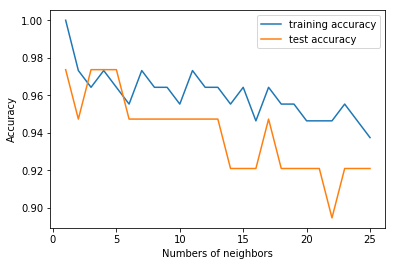

In [7]:
%matplotlib inline

# আগের সব গল্প, শুধু বাড়িয়েছি n_neighbors এর সংখ্যা - ২৫ পর্যন্ত 

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 25
neighbors_settings = range(1, 26)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#নিচের প্লটটা দেখাচ্ছে ট্রেনিং এবং টেস্ট সেটের অ্যাক্যুরেসি 
import matplotlib.pyplot as plt

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Numbers of neighbors")
plt.legend()